In [1]:
import numpy as np
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

In [20]:
# Parameters that define the state-space model
a = 5.
b = 1.

# Parameters that define the cost
q = 1.
r = 1.

# Parameters that define the initial condition
x0 = 1.
t0 = 0.

In [3]:
def integrand(t, a, b, q, r, k, x0, t0):
    x = np.exp((a - b * k) * (t - t0)) * x0
    u = - k * x
    return q * x**2 + r * u**2

def get_cost(a, b, q, r, k, x0, t0, t1):
    cost, err = integrate.quad(integrand, t0, t1, args=(a, b, q, r, k, x0, t0))
    return cost

<IPython.core.display.Javascript object>


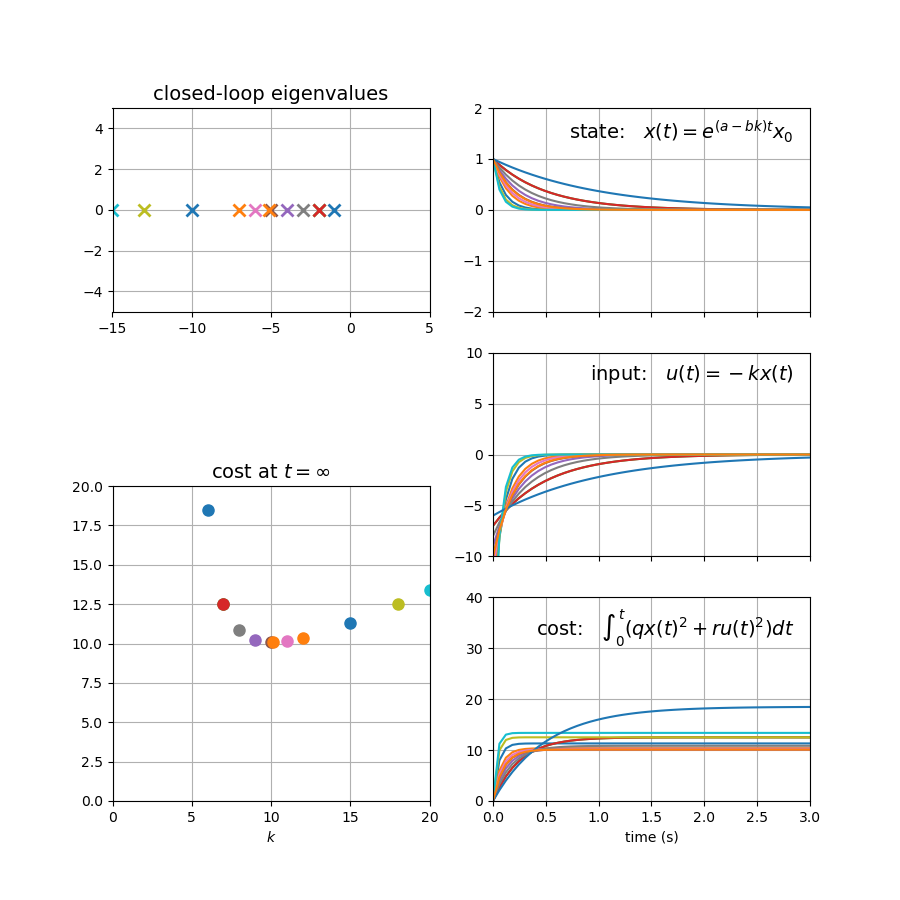

Text(0.5, 0, '$k$')

In [4]:
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax_x = plt.subplot(322)
ax_x.set_xlim(0, 3)
ax_x.set_ylim(-2, 2)
ax_u = plt.subplot(324, sharex=ax_x)
ax_u.set_ylim(-10, 10)
ax_cost = plt.subplot(326, sharex=ax_x)
ax_cost.set_ylim(0, 40)

ax_eig = plt.subplot(321)
ax_eig.set_xlim(-15, 5)
ax_eig.set_ylim(-5, 5)

ax_costatinfinity = plt.subplot(223)
ax_costatinfinity.set_xlim(0, 20)
ax_costatinfinity.set_ylim(0, 20)

ax_x.tick_params(labelbottom=False)
ax_u.tick_params(labelbottom=False)
ax_cost.set_xlabel('time (s)')

ax_x.text(0.95, 0.95, 'state:   $x(t) = e^{(a - bk)t} x_0$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_x.transAxes,
          fontsize=14)
ax_u.text(0.95, 0.95, 'input:   $u(t) = -k x(t)$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_u.transAxes,
          fontsize=14)
ax_cost.text(0.95, 0.95, 'cost:   $\int_0^t (qx(t)^2 + ru(t)^2) dt$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_cost.transAxes,
          fontsize=14)
ax_eig.set_title('closed-loop eigenvalues', fontsize=14)
ax_costatinfinity.set_title('cost at $t=\infty$', fontsize=14)

ax_x.grid()
ax_u.grid()
ax_cost.grid()
ax_eig.grid()
ax_costatinfinity.grid()

ax_costatinfinity.set_xlabel('$k$')

In [21]:
# Pick gain
k = 10.099019513592777

# Get eigenvalue
s = a - b * k

# Get the state, input, and cost as functions of time
t = np.linspace(0., 3.)
x = np.exp((a - b * k) * (t - t0)) * x0
u = - k * x
cost = np.array([get_cost(a, b, q, r, k, x0, t0, t1) for t1 in t])

# Get the cost at infinity
cost_at_infinity = get_cost(a, b, q, r, k, x0, t0, np.inf)

# Plot everything
ax_x.plot(t, x)
ax_u.plot(t, u)
ax_cost.plot(t, cost)
ax_eig.plot(s, 0, 'x', markersize=8, markeredgewidth=2)
ax_costatinfinity.plot(k, cost_at_infinity, '.', markersize=16)

In [17]:
# Define state-space system
A = np.array([[a]])
B = np.array([[b]])

# Define weights
Q = np.diag([q])
R = np.diag([r])

# Define initial condition
x0 = np.array([[1.]])

# Find optimal cost matrix
P = linalg.solve_continuous_are(A, B, Q, R)

# Find optimal gain matrix
K = linalg.inv(R) @  B.T @ P
print(f'K = {K.tolist()}')

# Find optimal total cost
total_cost = (x0.T @ P @ x0).item()
print(f'total_cost = {total_cost}')

K = [[10.099019513592777]]
total_cost = 10.099019513592777


## Effect of changing initial condition

In [ ]:
# Parameters that define the state-space model
a = 5.
b = 1.

# Parameters that define the cost
q = 1.
r = 1.

# Parameters that define the initial condition
x0 = 1.
t0 = 0.

In [ ]:
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax_x = plt.subplot(322)
ax_x.set_xlim(0, 3)
ax_x.set_ylim(-2, 2)
ax_u = plt.subplot(324, sharex=ax_x)
ax_u.set_ylim(-10, 10)
ax_cost = plt.subplot(326, sharex=ax_x)
ax_cost.set_ylim(0, 40)

ax_eig = plt.subplot(321)
ax_eig.set_xlim(-15, 5)
ax_eig.set_ylim(-5, 5)

ax_costatinfinity = plt.subplot(223)
ax_costatinfinity.set_xlim(0, 20)
ax_costatinfinity.set_ylim(0, 20)

ax_x.tick_params(labelbottom=False)
ax_u.tick_params(labelbottom=False)
ax_cost.set_xlabel('time (s)')

ax_x.text(0.95, 0.95, 'state:   $x(t) = e^{(a - bk)t} x_0$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_x.transAxes,
          fontsize=14)
ax_u.text(0.95, 0.95, 'input:   $u(t) = -k x(t)$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_u.transAxes,
          fontsize=14)
ax_cost.text(0.95, 0.95, 'cost:   $\int_0^t (qx(t)^2 + ru(t)^2) dt$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_cost.transAxes,
          fontsize=14)
ax_eig.set_title('closed-loop eigenvalues', fontsize=14)
ax_costatinfinity.set_title('cost at $t=\infty$', fontsize=14)

ax_x.grid()
ax_u.grid()
ax_cost.grid()
ax_eig.grid()
ax_costatinfinity.grid()

ax_costatinfinity.set_xlabel('$k$')

In [ ]:
for k in [6, 8, 10, 12, 14, 16, 18, 20]:
    
    # Get eigenvalue
    s = a - b * k

    # Get the state, input, and cost as functions of time
    t = np.linspace(0., 3.)
    x = np.exp((a - b * k) * (t - t0)) * x0
    u = - k * x
    cost = np.array([get_cost(a, b, q, r, k, x0, t0, t1) for t1 in t])

    # Get the cost at infinity
    cost_at_infinity = get_cost(a, b, q, r, k, x0, t0, np.inf)

    # Plot everything
    ax_x.plot(t, x)
    ax_u.plot(t, u)
    ax_cost.plot(t, cost)
    ax_eig.plot(s, 0, 'x', markersize=8, markeredgewidth=2)
    ax_costatinfinity.plot(k, cost_at_infinity, '.', markersize=16)

In [ ]:
# Define state-space system
A = np.array([[a]])
B = np.array([[b]])

# Define weights
Q = np.diag([q])
R = np.diag([r])

# Define initial condition
x0 = np.array([[1.]])

# Find optimal cost matrix
P = linalg.solve_continuous_are(A, B, Q, R)

# Find optimal gain matrix
K = linalg.inv(R) @  B.T @ P
print(f'K = {K.tolist()}')

# Find optimal total cost
total_cost = (x0.T @ P @ x0).item()
print(f'total_cost = {total_cost}')

## Effect of changing weights

In [ ]:
# Parameters that define the state-space model
a = 5.
b = 1.

# Parameters that define the cost
q = 1.
r = 1.

# Parameters that define the initial condition
x0 = 1.
t0 = 0.

In [ ]:
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax_x = plt.subplot(322)
ax_x.set_xlim(0, 3)
ax_x.set_ylim(-2, 2)
ax_u = plt.subplot(324, sharex=ax_x)
ax_u.set_ylim(-10, 10)
ax_cost = plt.subplot(326, sharex=ax_x)
ax_cost.set_ylim(0, 40)

ax_eig = plt.subplot(321)
ax_eig.set_xlim(-15, 5)
ax_eig.set_ylim(-5, 5)

ax_costatinfinity = plt.subplot(223)
ax_costatinfinity.set_xlim(0, 20)
ax_costatinfinity.set_ylim(0, 20)

ax_x.tick_params(labelbottom=False)
ax_u.tick_params(labelbottom=False)
ax_cost.set_xlabel('time (s)')

ax_x.text(0.95, 0.95, 'state:   $x(t) = e^{(a - bk)t} x_0$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_x.transAxes,
          fontsize=14)
ax_u.text(0.95, 0.95, 'input:   $u(t) = -k x(t)$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_u.transAxes,
          fontsize=14)
ax_cost.text(0.95, 0.95, 'cost:   $\int_0^t (qx(t)^2 + ru(t)^2) dt$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_cost.transAxes,
          fontsize=14)
ax_eig.set_title('closed-loop eigenvalues', fontsize=14)
ax_costatinfinity.set_title('cost at $t=\infty$', fontsize=14)

ax_x.grid()
ax_u.grid()
ax_cost.grid()
ax_eig.grid()
ax_costatinfinity.grid()

ax_costatinfinity.set_xlabel('$k$')

In [ ]:
for k in [6, 8, 10, 12, 14, 16, 18, 20]:
    
    # Get eigenvalue
    s = a - b * k

    # Get the state, input, and cost as functions of time
    t = np.linspace(0., 3.)
    x = np.exp((a - b * k) * (t - t0)) * x0
    u = - k * x
    cost = np.array([get_cost(a, b, q, r, k, x0, t0, t1) for t1 in t])

    # Get the cost at infinity
    cost_at_infinity = get_cost(a, b, q, r, k, x0, t0, np.inf)

    # Plot everything
    ax_x.plot(t, x)
    ax_u.plot(t, u)
    ax_cost.plot(t, cost)
    ax_eig.plot(s, 0, 'x', markersize=8, markeredgewidth=2)
    ax_costatinfinity.plot(k, cost_at_infinity, '.', markersize=16)

In [ ]:
# Define state-space system
A = np.array([[a]])
B = np.array([[b]])

# Define weights
Q = np.diag([q])
R = np.diag([r])

# Define initial condition
x0 = np.array([[1.]])

# Find optimal cost matrix
P = linalg.solve_continuous_are(A, B, Q, R)

# Find optimal gain matrix
K = linalg.inv(R) @  B.T @ P
print(f'K = {K.tolist()}')

# Find optimal total cost
total_cost = (x0.T @ P @ x0).item()
print(f'total_cost = {total_cost}')